In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.duplicated().sum()
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Diabetes Outcome')

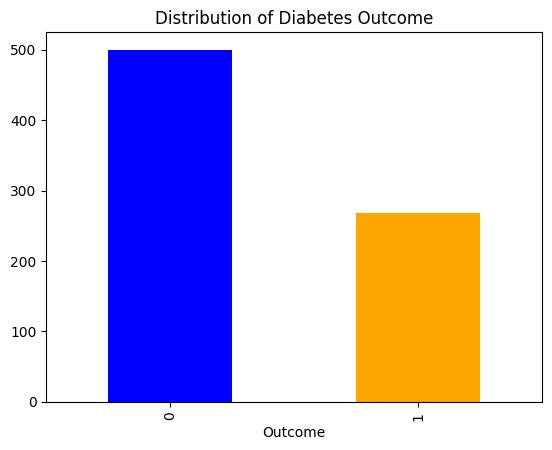

In [10]:
df['Outcome'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Diabetes Outcome')

In [11]:
col_with_zero=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[col_with_zero]==0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [12]:
df[col_with_zero]=df[col_with_zero].replace(0, np.nan)

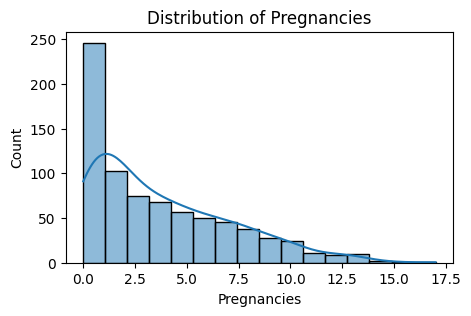

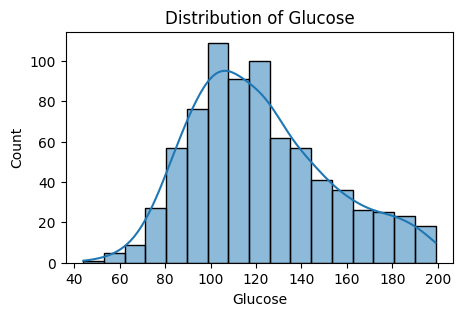

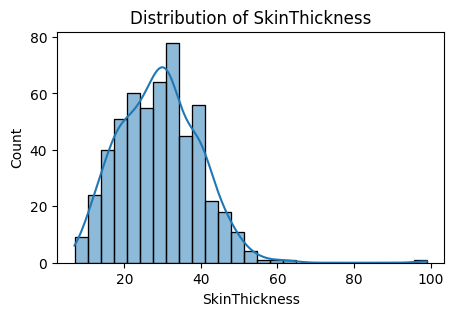

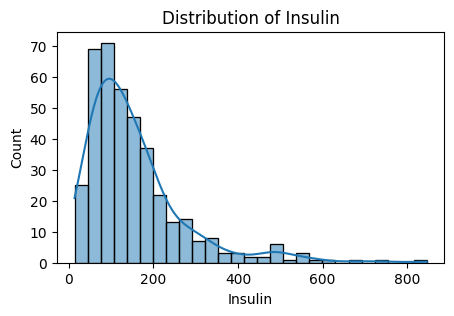

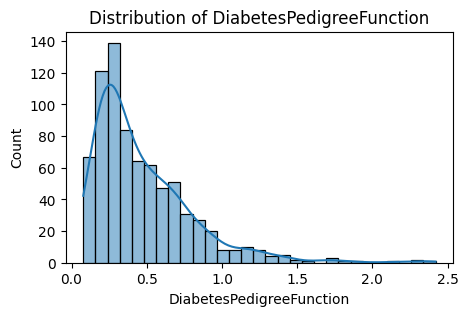

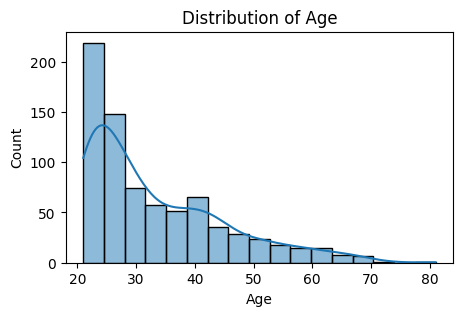

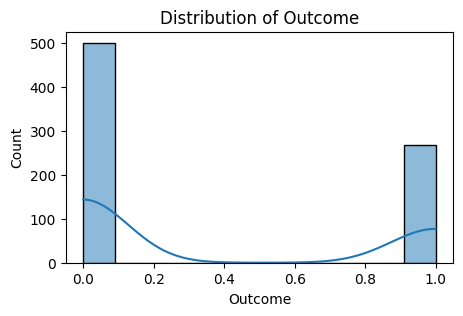

In [13]:
for col in df.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

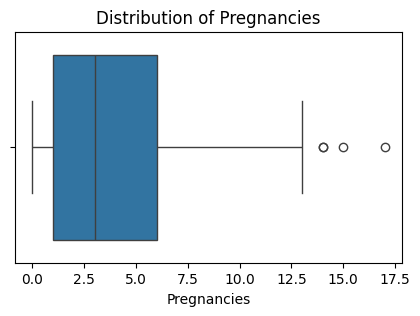

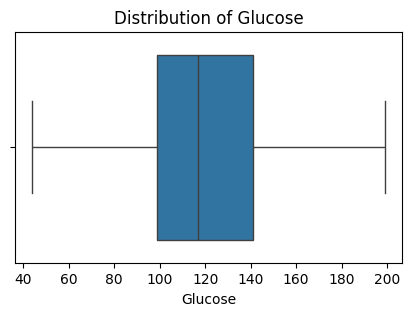

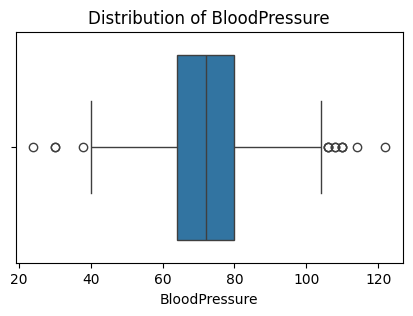

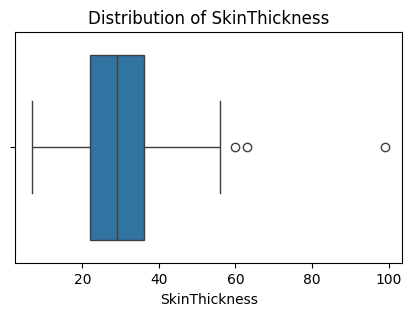

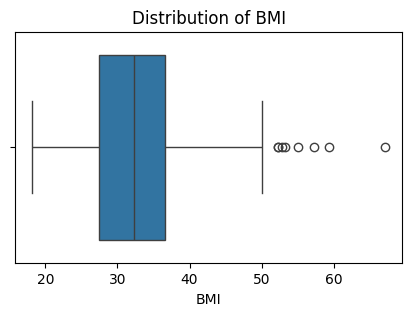

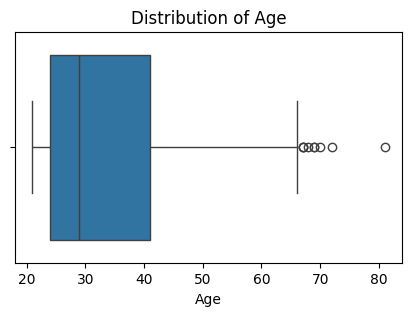

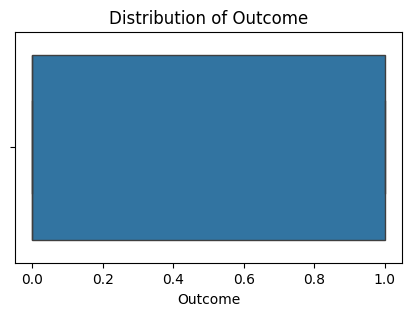

In [14]:
for col in df.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [15]:
def replace_outlier_median(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    median=df[col].median()

    df[col]=df[col].apply(lambda x:median if x<lower or x>upper else x)
    return df

In [16]:
for col in df.columns:
    if col!= 'Outcome':
        df=replace_outlier_median(df, col)

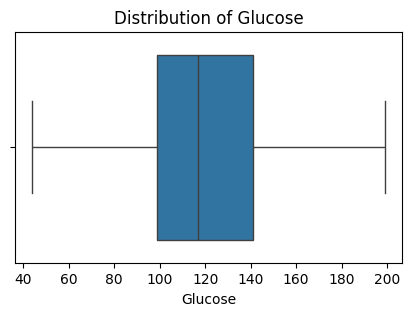

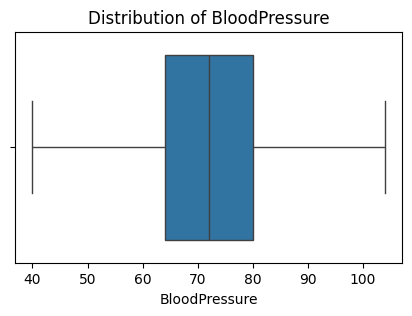

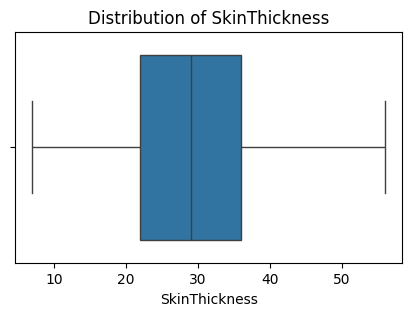

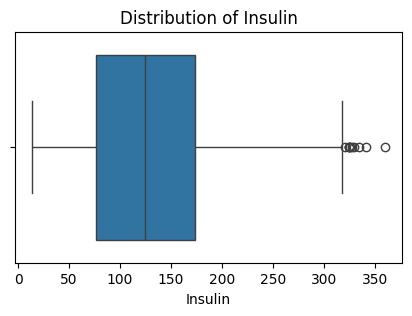

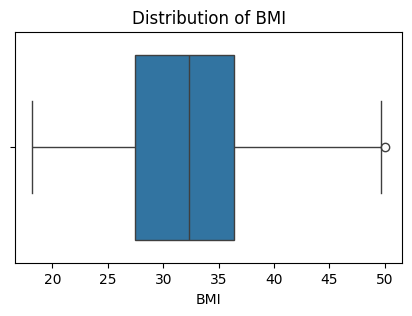

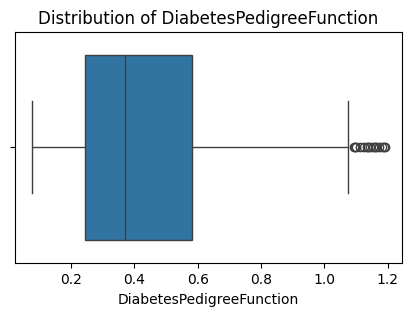

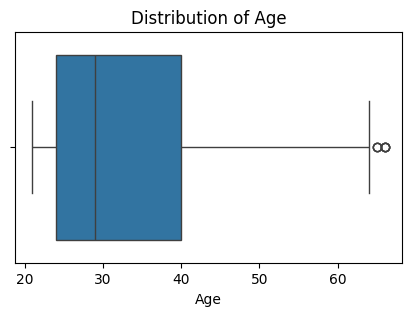

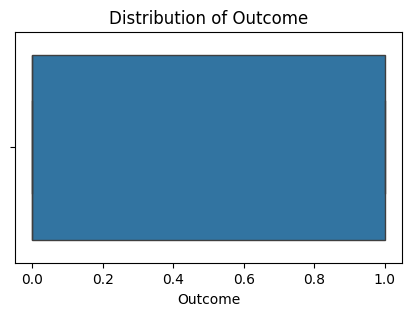

In [17]:
for col in df.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

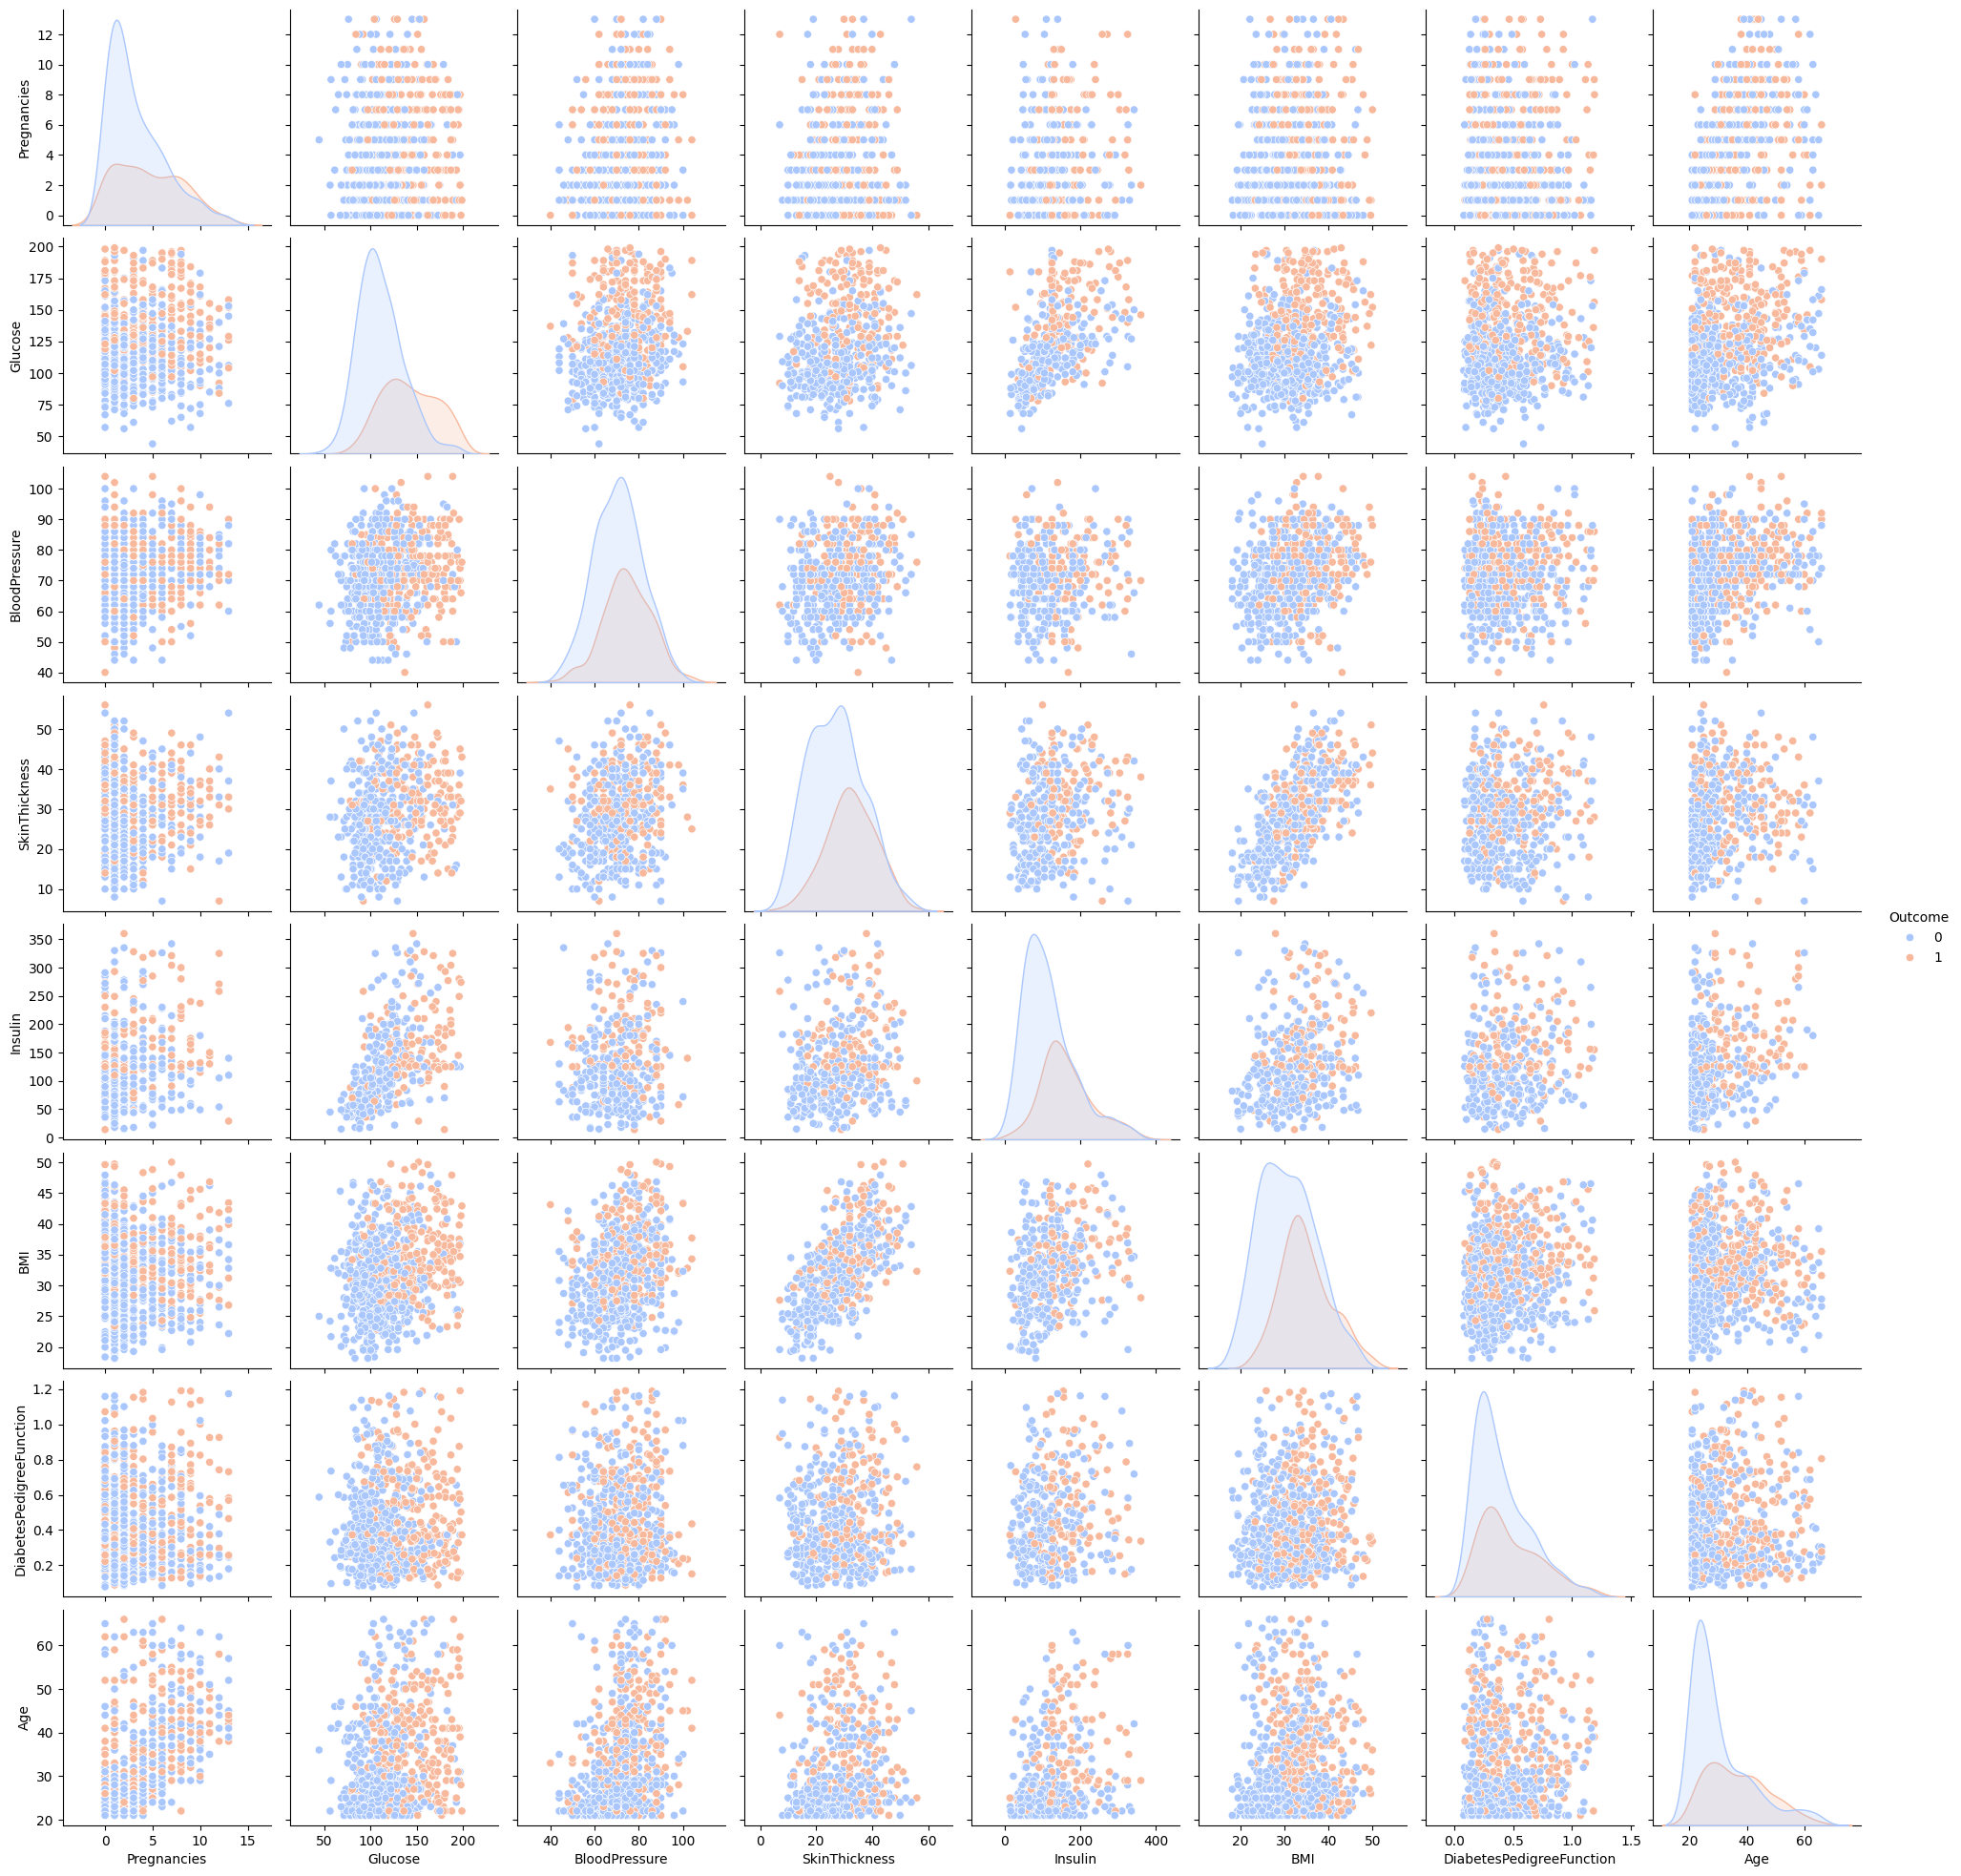

In [18]:
sns.pairplot(df, hue='Outcome', palette='coolwarm')
#sns.pairplot(df)
plt.show()

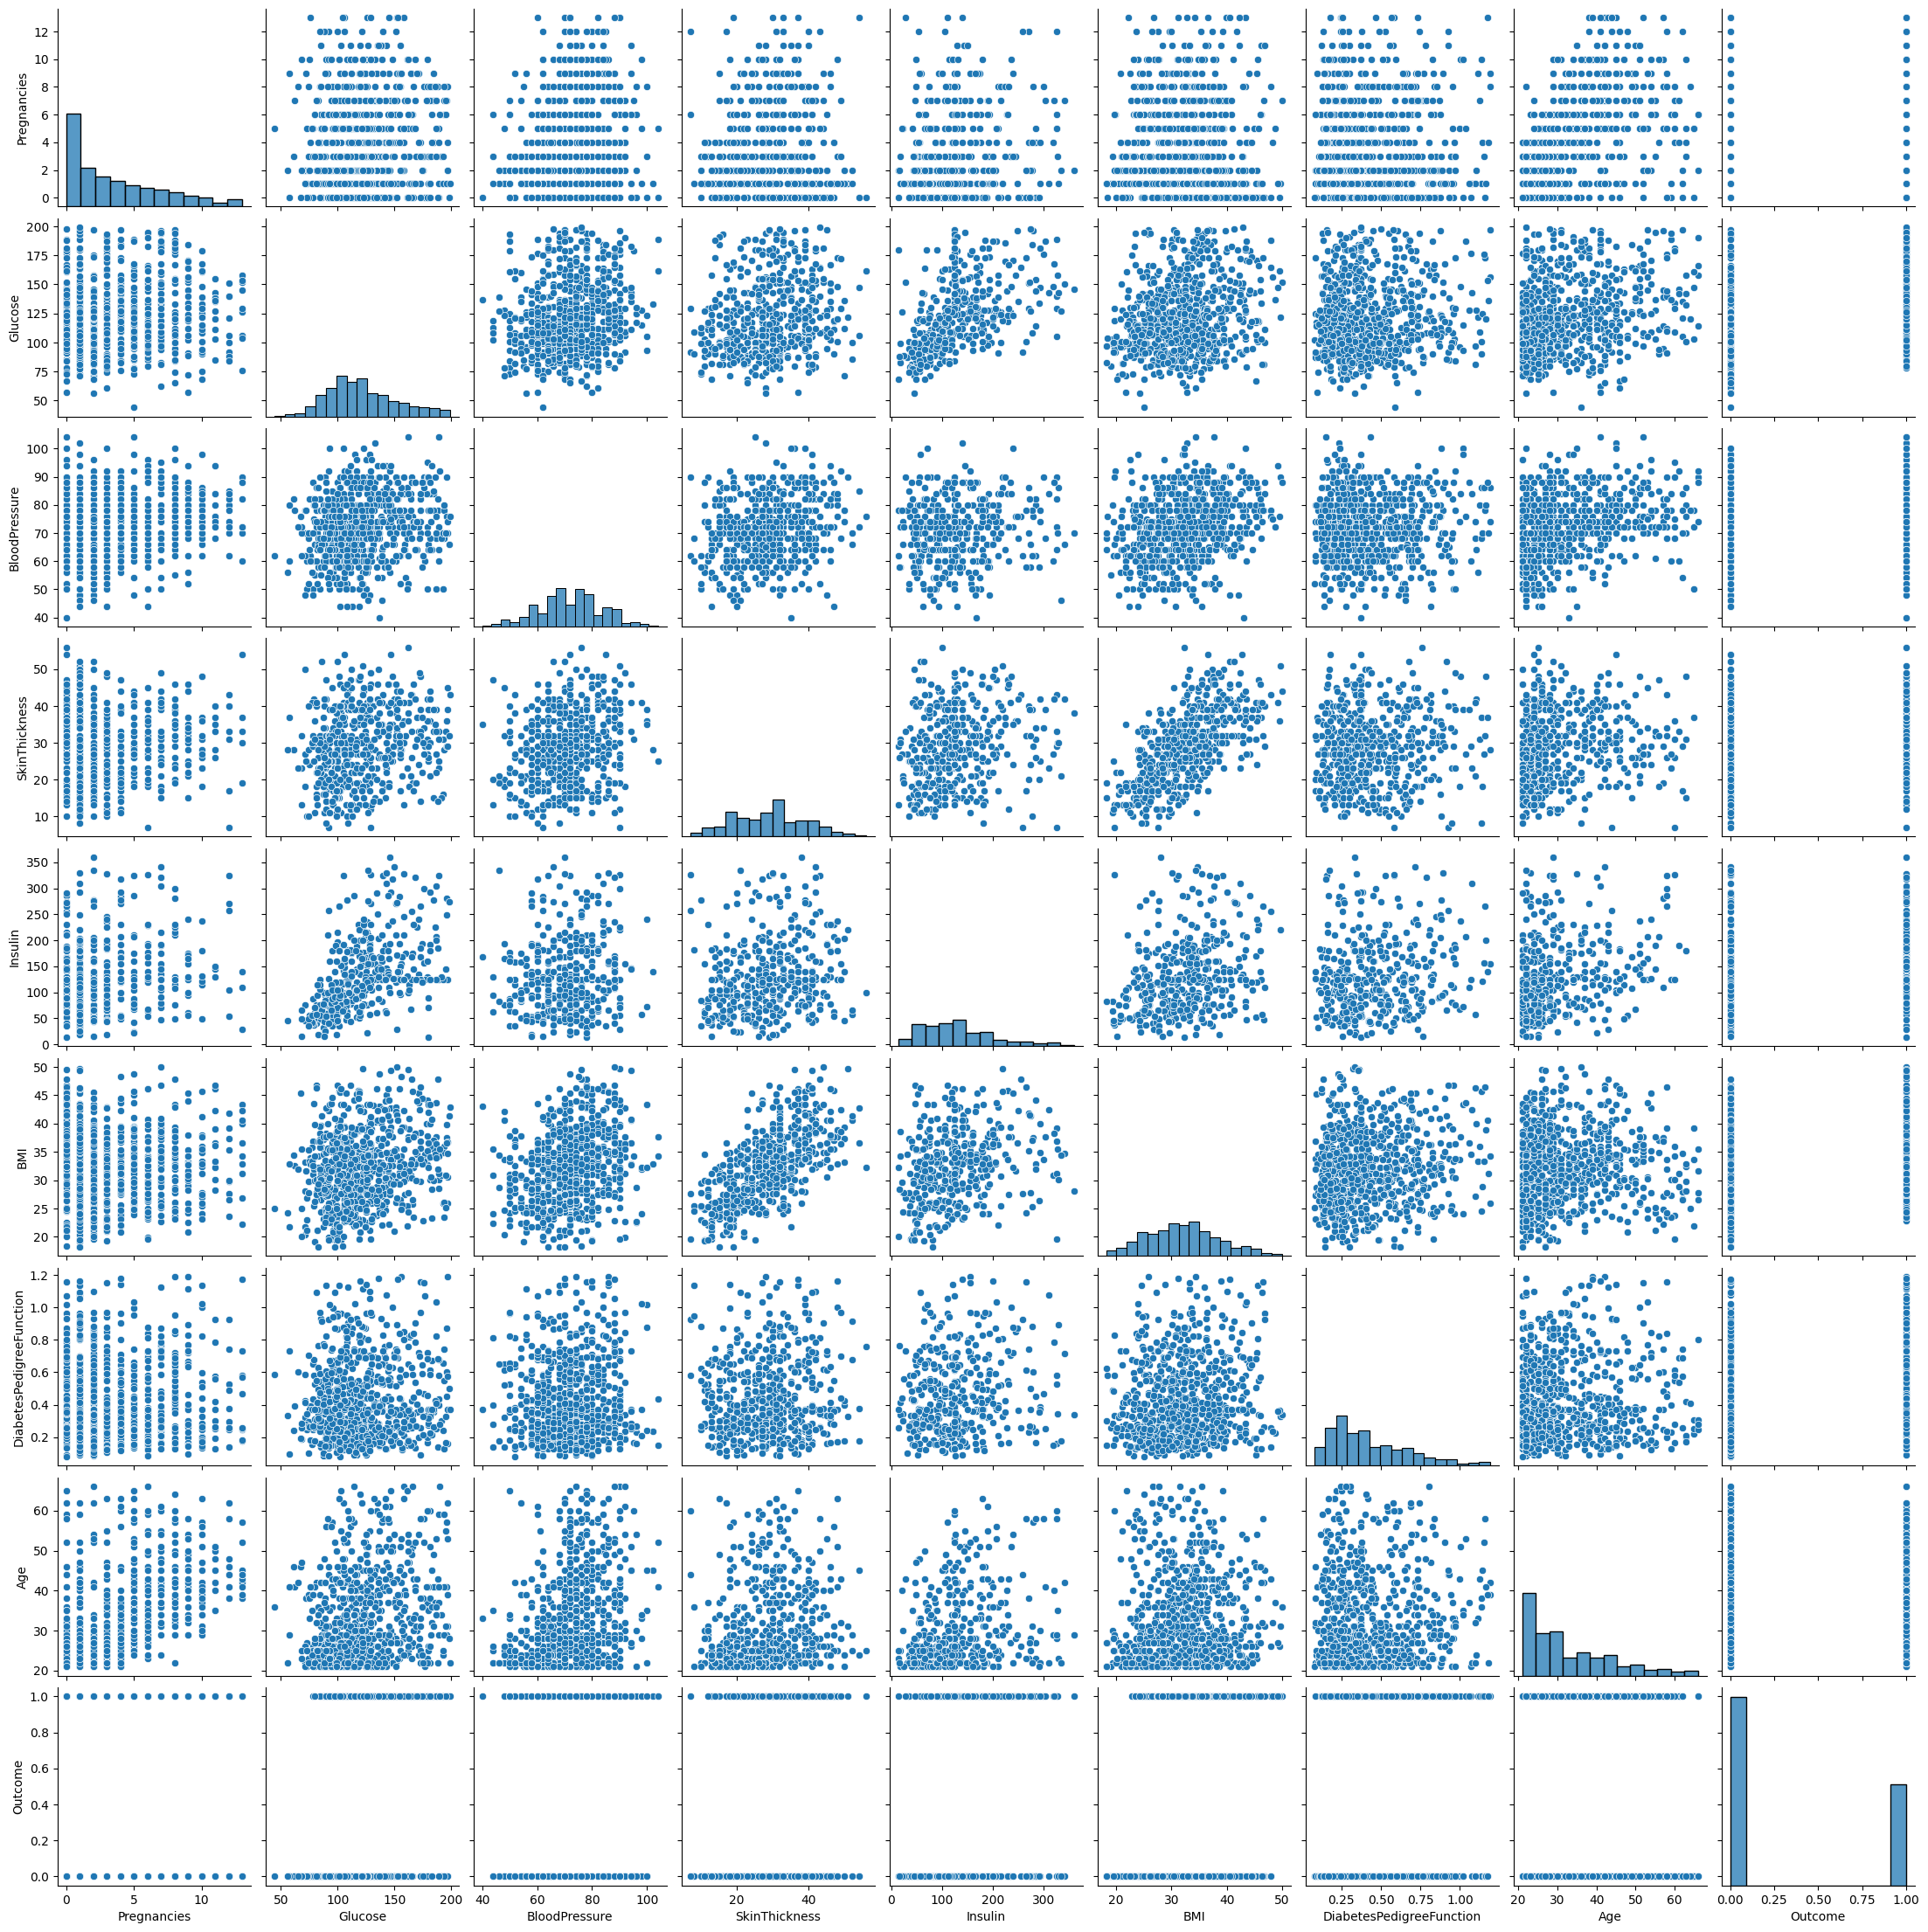

<Figure size 3000x1000 with 0 Axes>

In [19]:
sns.pairplot(df)
plt.figure(figsize=(30, 10))
plt.show()

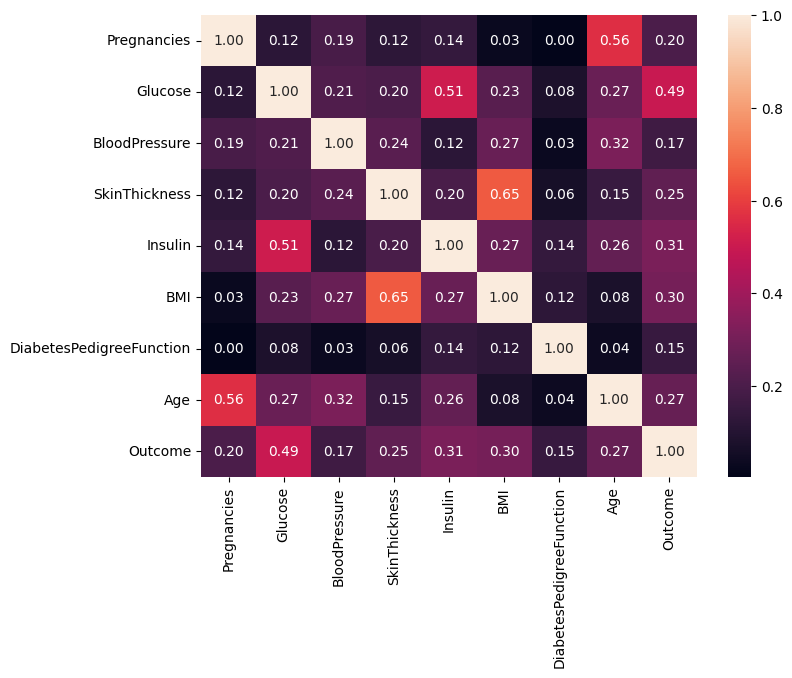

In [20]:
corr=df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

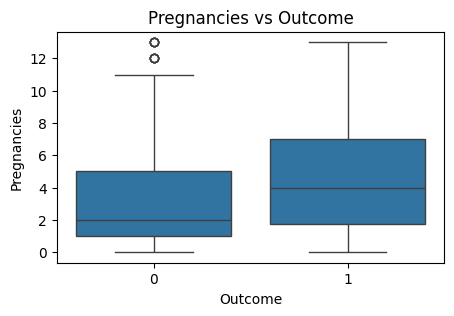

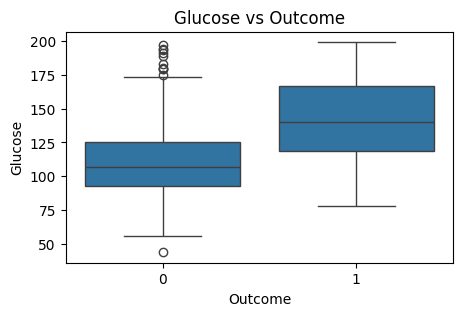

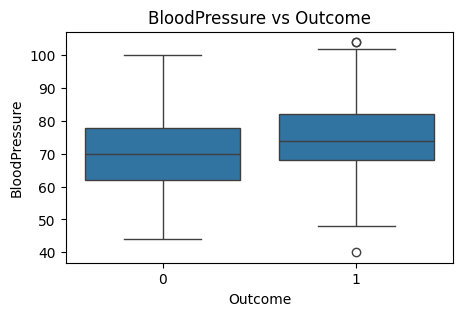

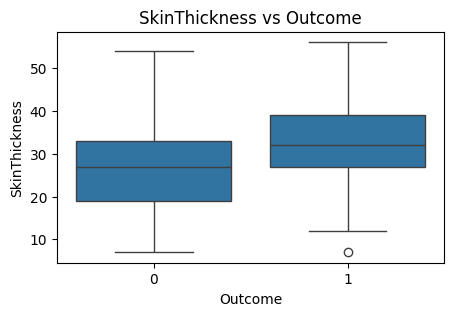

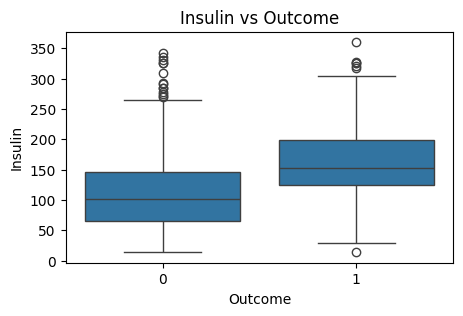

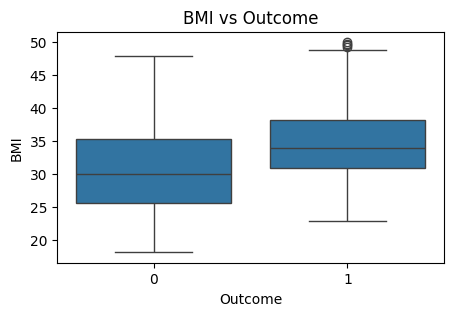

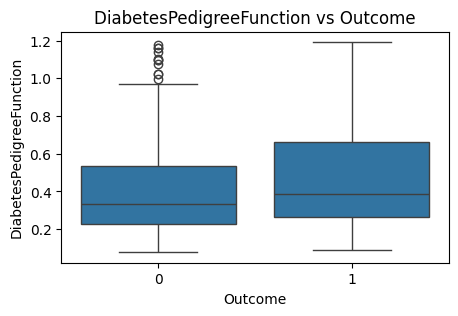

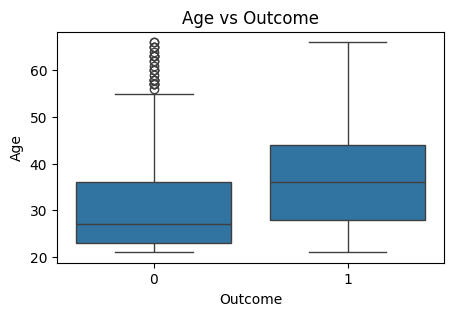

In [21]:
for col in df.columns[:-1]:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} vs Outcome')
    plt.show()

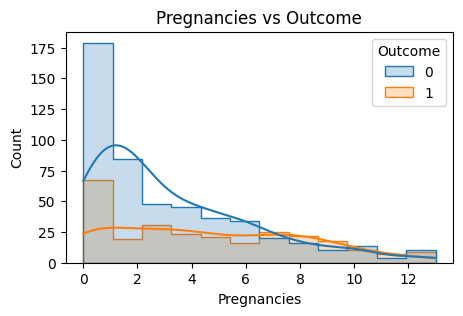

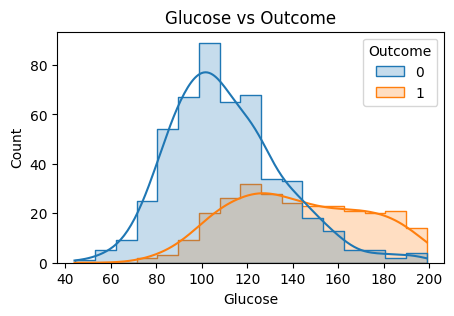

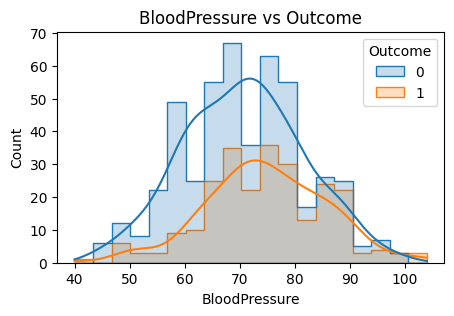

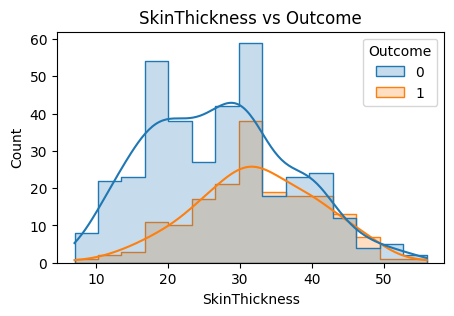

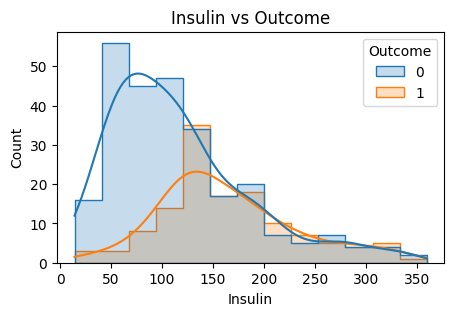

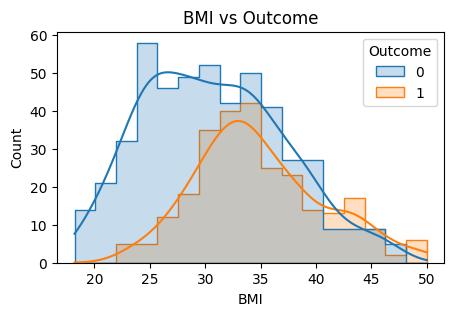

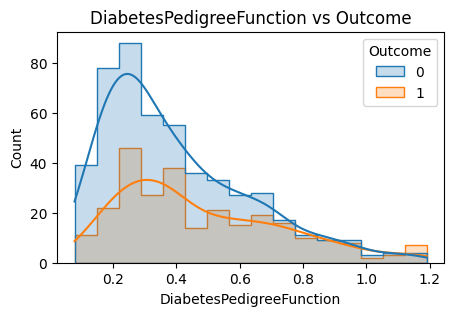

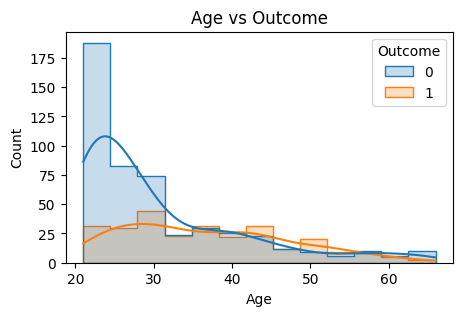

In [22]:
for col in df.columns[:-1]:
    plt.figure(figsize=(5, 3))
    sns.histplot(hue='Outcome', x=col, data=df, kde=True, element='step')
    plt.title(f'{col} vs Outcome')
    plt.show()

In [23]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                    0.6270  50.0        1  
1                    0.3510  31.0        0  
2                    0.6720  32.0        1  
3                    0.1670  21.0        0  
4                    0.3725  33.0        1

In [24]:
sel_features=['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI']
X=df[sel_features]
y=df['Outcome']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
features_used = X.columns.tolist()
import joblib
joblib.dump(features_used, "features_used.pkl")

['features_used.pkl']

In [27]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed=imputer.transform(X_test)

In [28]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_resampled)
X_test=scaler.transform(X_test_imputed)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

logreg=LogisticRegression()

param_grid={
    'C':[0.01, 0.1, 1, 10, 100], 
    'penalty':['l1', 'l2'], 
    'solver':['liblinear', 'saga'], 
    'max_iter':[100, 300, 500]
}

In [31]:
grid_search=GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [32]:
grid_search.fit(X_train, y_train_resampled)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 300, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [33]:
grid_search.fit(X_train, y_train_resampled)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 300, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [34]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Cross Validation Score: 0.7382065217391304


In [35]:
best_log_reg=grid_search.best_estimator_
y_pred=best_log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        99
           1       0.63      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154



In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [37]:
models={
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train_resampled)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_resampled, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train_resampled, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train_resampled, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train_resampled, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_resampled, model.predict_proba(X_train)[:,1])

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) #Calculate Roc

    print(list(models.keys())[i])

    print("Training Set Performance:")
    print(f"Accuracy: {model_train_accuracy:.4f}")
    print(f"F1 Score: {model_train_f1:.4f}")
    print(f"Precision: {model_train_precision:.4f}")
    print(f"Recall: {model_train_recall:.4f}")
    print(f"ROC AUC Score: {model_train_rocauc_score:.4f}")

    print("-----------------------------")

    print("Test Set Performance:")
    print(f"Accuracy: {model_test_accuracy:.4f}") 
    print(f"F1 Score: {model_test_f1:.4f}")
    print(f"Precision: {model_test_precision:.4f}")
    print(f"Recall: {model_test_recall:.4f}")
    print(f"ROC AUC Score: {model_test_rocauc_score:.4f}")

    print("\n")

Random Forest
Training Set Performance:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC Score: 1.0000
-----------------------------
Test Set Performance:
Accuracy: 0.6883
F1 Score: 0.6940
Precision: 0.5507
Recall: 0.6909
ROC AUC Score: 0.7795


Gradient Boosting
Training Set Performance:
Accuracy: 0.9015
F1 Score: 0.9014
Precision: 0.8762
Recall: 0.9352
ROC AUC Score: 0.9699
-----------------------------
Test Set Performance:
Accuracy: 0.7338
F1 Score: 0.7380
Precision: 0.6061
Recall: 0.7273
ROC AUC Score: 0.7927


AdaBoost
Training Set Performance:
Accuracy: 0.7880
F1 Score: 0.7880
Precision: 0.7810
Recall: 0.8005
ROC AUC Score: 0.8720
-----------------------------
Test Set Performance:
Accuracy: 0.7468
F1 Score: 0.7512
Precision: 0.6176
Recall: 0.7636
ROC AUC Score: 0.8231


Decision Tree
Training Set Performance:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC Score: 1.0000
-----------------------------
Test Set Performance:
Accu

In [38]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "sqrt", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

gb_params={"learning_rate": [0.01, 0.1, 0.2],
           "n_estimators": [100, 200, 500, 1000],
            "max_depth": [3, 5, 7, 9],
            'min_samples_split': [2, 5, 10],
            "subsample": [0.8, 0.9, 1.0]}

ada_params={"n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2], 
            "algorithm": ["SAMME"],
            "estimator": [
                DecisionTreeClassifier(max_depth=1),
                DecisionTreeClassifier(max_depth=2),
                DecisionTreeClassifier(max_depth=3)]}

In [39]:
randomcv_models=[("RF", RandomForestClassifier(), rf_params), 
                 ("GB", GradientBoostingClassifier(), gb_params), 
                 ("ADA", AdaBoostClassifier(), ada_params)]

In [40]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'sqrt', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('GB',
  GradientBoostingClassifier(),
  {'learning_rate': [0.01, 0.1, 0.2],
   'n_estimators': [100, 200, 500, 1000],
   'max_depth': [3, 5, 7, 9],
   'min_samples_split': [2, 5, 10],
   'subsample': [0.8, 0.9, 1.0]}),
 ('ADA',
  AdaBoostClassifier(),
  {'n_estimators': [50, 100, 200],
   'learning_rate': [0.01, 0.1, 0.2],
   'algorithm': ['SAMME'],
   'estimator': [DecisionTreeClassifier(max_depth=1),
    DecisionTreeClassifier(max_depth=2),
    DecisionTreeClassifier(max_depth=3)]})]

In [41]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}

for name, model, param in randomcv_models:
    random_search=RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=100, cv=3, verbose=2, n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train_resampled)
    model_param[name] = random_search.best_params_

for model_name in model_param:
    print(f"{model_name} Best Parameters: {model_param[model_name]}") 


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


e:\Diabetes Prediction\project\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 27 candidates, totalling 81 fits


e:\Diabetes Prediction\project\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


RF Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 10}
GB Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.2}
ADA Best Parameters: {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3), 'algorithm': 'SAMME'}


In [42]:
models={"Random Forest":RandomForestClassifier(n_estimators= 200, min_samples_split= 15, max_features= 8, max_depth= 5, class_weight='balanced'), 
        "Gradient Boost":GradientBoostingClassifier(subsample= 0.8, n_estimators= 200, min_samples_split= 2, max_depth= 5, learning_rate= 0.01),
        "Adaboost":AdaBoostClassifier(n_estimators= 100, learning_rate= 0.2, estimator= DecisionTreeClassifier(max_depth=3), algorithm='SAMME') }



In [43]:
print("After hyperparameter tuning\n")

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train_resampled)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_resampled, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train_resampled, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train_resampled, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train_resampled, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_resampled, model.predict_proba(X_train)[:,1])

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) #Calculate Roc

    print(list(models.keys())[i])

    print("Training Set Performance:")
    print(f"Accuracy: {model_train_accuracy:.4f}")
    print(f"F1 Score: {model_train_f1:.4f}")
    print(f"Precision: {model_train_precision:.4f}")
    print(f"Recall: {model_train_recall:.4f}")
    print(f"ROC AUC Score: {model_train_rocauc_score:.4f}")

    print("-----------------------------")

    print("Test Set Performance:")
    print(f"Accuracy: {model_test_accuracy:.4f}") 
    print(f"F1 Score: {model_test_f1:.4f}")
    print(f"Precision: {model_test_precision:.4f}")
    print(f"Recall: {model_test_recall:.4f}")
    print(f"ROC AUC Score: {model_test_rocauc_score:.4f}")

    print("\n")

After hyperparameter tuning

Random Forest
Training Set Performance:
Accuracy: 0.8354
F1 Score: 0.8351
Precision: 0.8106
Recall: 0.8753
ROC AUC Score: 0.9232
-----------------------------
Test Set Performance:
Accuracy: 0.7338
F1 Score: 0.7388
Precision: 0.6000
Recall: 0.7636
ROC AUC Score: 0.8162


Gradient Boost
Training Set Performance:
Accuracy: 0.9040
F1 Score: 0.9038
Precision: 0.8733
Recall: 0.9451
ROC AUC Score: 0.9661
-----------------------------
Test Set Performance:
Accuracy: 0.7143
F1 Score: 0.7195
Precision: 0.5797
Recall: 0.7273
ROC AUC Score: 0.8073




e:\Diabetes Prediction\project\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Adaboost
Training Set Performance:
Accuracy: 0.8105
F1 Score: 0.8101
Precision: 0.7862
Recall: 0.8529
ROC AUC Score: 0.8967
-----------------------------
Test Set Performance:
Accuracy: 0.7403
F1 Score: 0.7453
Precision: 0.6056
Recall: 0.7818
ROC AUC Score: 0.8290




In [44]:
from sklearn.pipeline import Pipeline
final_model=AdaBoostClassifier(n_estimators= 50, learning_rate= 0.2, estimator=     DecisionTreeClassifier(max_depth=2), algorithm= 'SAMME')

pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler()), 
    ('model', final_model)
])

In [45]:
pipeline.fit(X_train, y_train_resampled)

e:\Diabetes Prediction\project\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME',
                                    estimator=DecisionTreeClassifier(max_depth=2),
                                    learning_rate=0.2))])

In [46]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]  # For ROC AUC

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Final model performance\n")
print("Test Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Final model performance

Test Set Performance:
Accuracy: 0.7013
Precision: 0.5600
Recall: 0.7636
F1 Score: 0.6462
ROC AUC Score: 0.8378


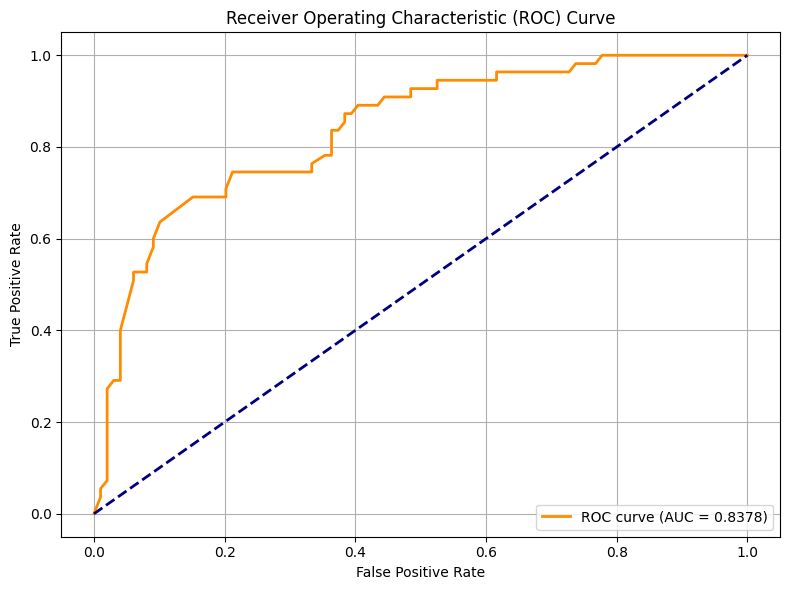

In [47]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
import joblib
joblib.dump(pipeline, 'diabetes_model_pipeline.pkl')


['diabetes_model_pipeline.pkl']

In [51]:
model = joblib.load("diabetes_model_pipeline.pkl")
print(isinstance(model, Pipeline))  # ✅ Now it will correctly print True

True
